In [ ]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px
from fbprophet import Prophet

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [ ]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
idf=df.set_index('timeStamp')
idf

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0000,46.13
2012-01-01 01:00:00,4752.1,0.0000,45.89
2012-01-01 02:00:00,4542.6,0.0000,45.04
2012-01-01 03:00:00,4357.7,0.0000,45.03
2012-01-01 04:00:00,4275.5,0.0000,42.61
...,...,...,...
2017-08-12 02:00:00,NaN,0.0000,70.84
2017-08-12 03:00:00,NaN,0.0000,70.57
2017-08-12 04:00:00,NaN,0.0000,69.89


In [ ]:
idf.isna().sum()

demand     81
precip    230
temp      186
dtype: int64

In [ ]:
idf['demand']=idf.demand.fillna(method='ffill')
idf['temp']=idf.temp.fillna(method='ffill')
idf['precip']=idf.precip.fillna(method='ffill')

idf.isna().sum()

demand    0
precip    0
temp      0
dtype: int64

In [ ]:
idf=idf.resample('D').mean()
idf

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5546.586500,0.002033,75.217500


In [ ]:
idf=idf.reset_index().rename(columns={'timeStamp':'ds','demand':'y'})

In [ ]:
f_idf=idf[['ds','y']]

In [ ]:
train = f_idf[(f_idf['ds']>='2012-01-01') & (f_idf['ds']<='2017-04-30')]
test = f_idf[(f_idf['ds']>'2017-04-30')]

In [ ]:
test.shape

(104, 2)

In [ ]:
pm=Prophet(interval_width=0.95,yearly_seasonality=True)

In [ ]:
pm.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=pm.make_future_dataframe(periods=104,freq='D')

In [ ]:
forecast=pm.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,6034.976982,4203.763149,6034.515207,6034.976982,6034.976982,-929.103746,-929.103746,-929.103746,-540.349618,-540.349618,-540.349618,-388.754128,-388.754128,-388.754128,0.0,0.0,0.0,5105.873236
1,2012-01-02,6035.420177,4899.396086,6701.132977,6035.420177,6035.420177,-246.492566,-246.492566,-246.492566,133.214316,133.214316,133.214316,-379.706882,-379.706882,-379.706882,0.0,0.0,0.0,5788.927611
2,2012-01-03,6035.863371,5001.591700,6874.451374,6035.863371,6035.863371,-129.735358,-129.735358,-129.735358,240.239680,240.239680,240.239680,-369.975038,-369.975038,-369.975038,0.0,0.0,0.0,5906.128013
3,2012-01-04,6036.306566,5037.284053,6801.614834,6036.306566,6036.306566,-121.683911,-121.683911,-121.683911,237.949347,237.949347,237.949347,-359.633258,-359.633258,-359.633258,0.0,0.0,0.0,5914.622655
4,2012-01-05,6036.749760,4895.770587,6783.929199,6036.749760,6036.749760,-152.089616,-152.089616,-152.089616,196.674705,196.674705,196.674705,-348.764320,-348.764320,-348.764320,0.0,0.0,0.0,5884.660145


In [ ]:
forecast_df=forecast[['ds','yhat','yhat_upper','yhat_lower']]

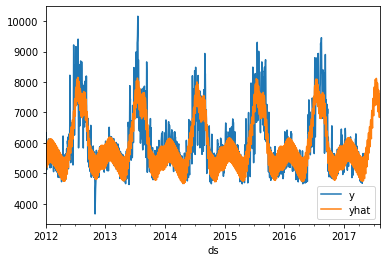

In [ ]:
pd.concat([train.set_index('ds')['y'],forecast_df.set_index('ds')['yhat']],axis=1).plot()

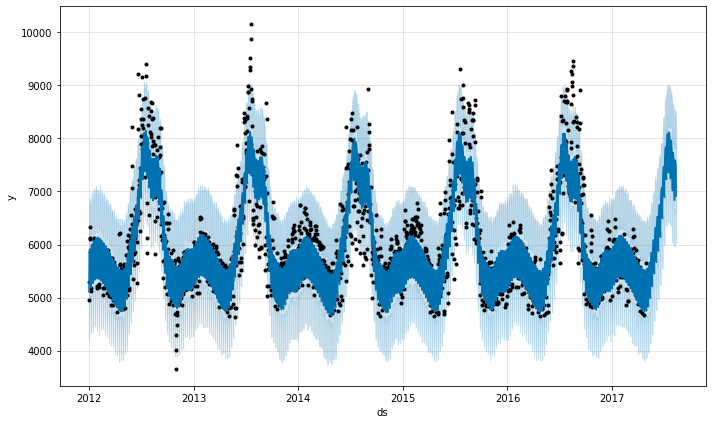

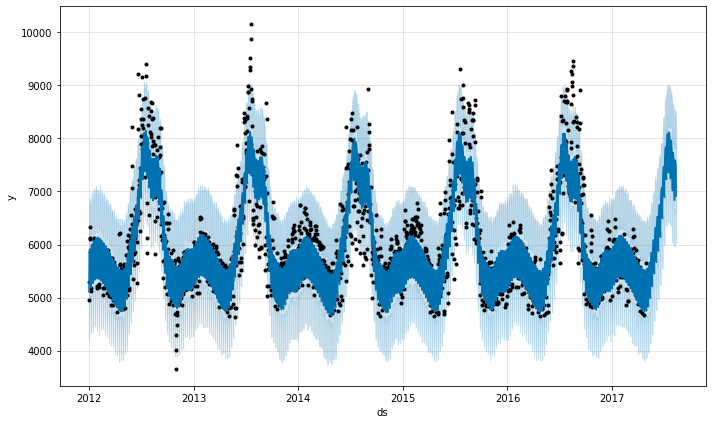

In [ ]:
pm.plot(forecast)

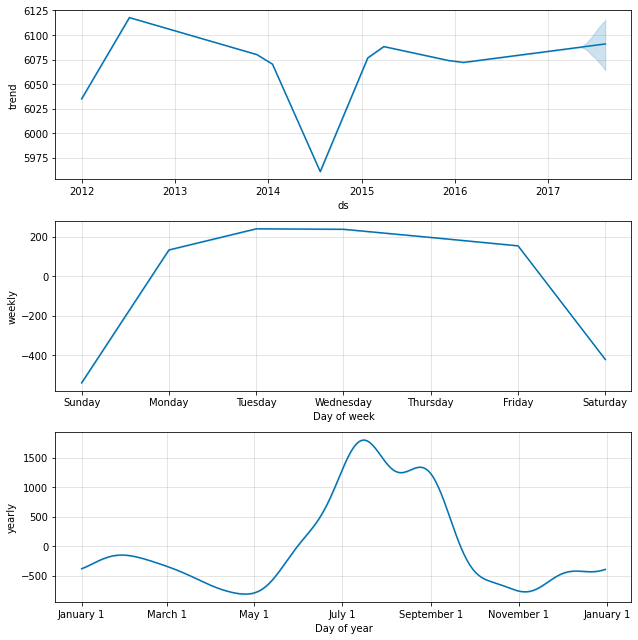

In [ ]:
fig2=pm.plot_components(forecast)

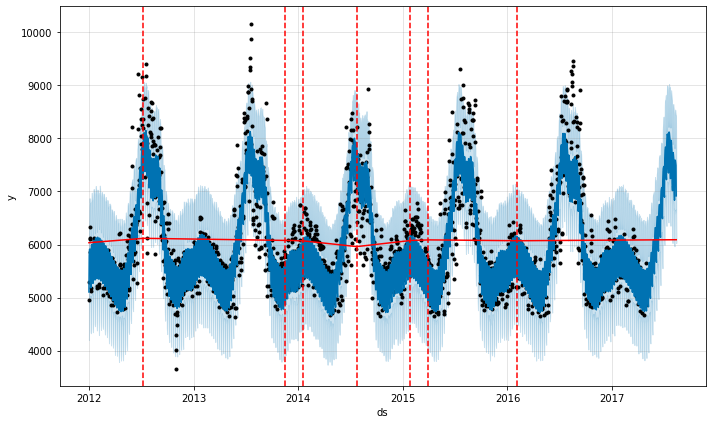

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig=pm.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),pm,forecast)

In [ ]:
pm.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(pm,forecast) #this returns the plotly figure
py.iplot(fig)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model = pm,initial = '731 days',horizon='365 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


In [ ]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5558.211787,4708.605745,6393.217765,5460.325000,2014-05-01
1,2014-05-03,4968.093567,4144.052180,5752.621791,4893.683333,2014-05-01
2,2014-05-04,4844.588449,4052.106230,5688.386779,4764.137500,2014-05-01
3,2014-05-05,5524.915111,4731.869193,6397.413576,5406.762500,2014-05-01
4,2014-05-06,5619.723054,4810.836469,6477.256061,5409.750000,2014-05-01


In [ ]:
from fbprophet.diagnostics import performance_metrics
perform_m=performance_metrics(cv_results)
perform_m

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,251323.181870,501.321436,405.843096,0.072964,0.065600,0.884615
1,37 days 00:00:00,258081.122549,508.016853,413.216947,0.074247,0.065713,0.879121
2,37 days 12:00:00,260379.783517,510.274224,416.608098,0.074830,0.066755,0.879121
3,38 days 00:00:00,262130.307985,511.986629,419.064918,0.075018,0.068184,0.879121
4,38 days 12:00:00,265815.248586,515.572738,424.299026,0.075854,0.068890,0.879121
...,...,...,...,...,...,...,...
653,363 days 00:00:00,259187.106637,509.104220,445.918556,0.082325,0.081453,0.983516
654,363 days 12:00:00,260814.632296,510.700139,447.015635,0.082519,0.082176,0.983516
655,364 days 00:00:00,265232.168592,515.006960,450.652773,0.083372,0.083469,0.983516
656,364 days 12:00:00,265225.572934,515.000556,450.379225,0.083359,0.083469,0.983516


## Multivariate Analysis

In [ ]:
idf.head()

,ds,y,precip,temp
0,2012-01-01,4954.833333,0.002487,46.510000
1,2012-01-02,5302.954167,0.000000,40.496667
2,2012-01-03,6095.512500,0.000000,26.672500
3,2012-01-04,6336.266667,0.000000,20.585000
4,2012-01-05,6130.245833,0.000000,33.577500


In [ ]:
midf=idf.copy()
midf['month']=midf['ds'].dt.month
midf.head(2)

,ds,y,precip,temp,month
0,2012-01-01,4954.833333,0.002487,46.510000,1
1,2012-01-02,5302.954167,0.000000,40.496667,1


In [ ]:
midf['summer_temp']=midf.apply(lambda x: 1 if x['temp']>=80 else 0,axis=1)
midf['bins']=pd.cut(midf['month'],bins=3,labels=False)
midf.drop('precip',axis=1,inplace=True)
midf.head(3)

,ds,y,temp,month,summer_temp,bins
0,2012-01-01,4954.833333,46.510000,1,0,0
1,2012-01-02,5302.954167,40.496667,1,0,0
2,2012-01-03,6095.512500,26.672500,1,0,0


In [ ]:
mm=Prophet(changepoint_range=0.9,yearly_seasonality=True)

In [ ]:
mm.add_regressor('summer_temp')
mm.add_regressor('bins',mode='multiplicative')

In [ ]:
#final_df=midf[['ds','y']]

In [ ]:
train = midf[(midf['ds']>='2012-01-01') & (midf['ds']<='2017-04-30')]
test = midf[(midf['ds']>'2017-04-30')]

In [ ]:
train.shape

(1947, 6)

In [ ]:
test.shape

(104, 6)

In [ ]:
mm.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=mm.make_future_dataframe(periods=104)

In [ ]:
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [ ]:
future['summer_temp']= midf['summer_temp']
future['bins']= midf['bins']

In [ ]:
future

,ds,summer_temp,bins
0,2012-01-01,0,0
1,2012-01-02,0,0
2,2012-01-03,0,0
3,2012-01-04,0,0
4,2012-01-05,0,0
...,...,...,...
2046,2017-08-08,0,1
2047,2017-08-09,0,1
2048,2017-08-10,0,1
2049,2017-08-11,0,1


In [ ]:
forecast=mm.predict(future)

In [ ]:
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,bins,bins_lower,bins_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,extra_regressors_multiplicative,extra_regressors_multiplicative_lower,extra_regressors_multiplicative_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,summer_temp,summer_temp_lower,summer_temp_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2012-01-01,5896.462398,4628.315504,5631.757587,5896.462398,5896.462398,-843.25894,-843.25894,-843.25894,0.010543,0.010543,0.010543,0.0,0.0,0.0,0.010543,0.010543,0.010543,0.010543,0.010543,0.010543,0.0,0.0,0.0,-529.159727,-529.159727,-529.159727,-314.099213,-314.099213,-314.099213,5115.372069
1,2012-01-02,5897.503899,5290.373679,6250.093873,5897.503899,5897.503899,-182.95517,-182.95517,-182.95517,0.010543,0.010543,0.010543,0.0,0.0,0.0,0.010543,0.010543,0.010543,0.010543,0.010543,0.010543,0.0,0.0,0.0,129.865326,129.865326,129.865326,-312.820497,-312.820497,-312.820497,5776.728321


In [ ]:
forecast_df=forecast[['ds','yhat','yhat_lower','yhat_upper']]
forecast_df.tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7280.790652,6773.435485,7785.570678
2047,2017-08-09,7292.082186,6780.944149,7797.203478
2048,2017-08-10,7261.559145,6753.009930,7774.097170
2049,2017-08-11,7211.798703,6731.750061,7695.333322
2050,2017-08-12,6630.744067,6163.488998,7156.261004


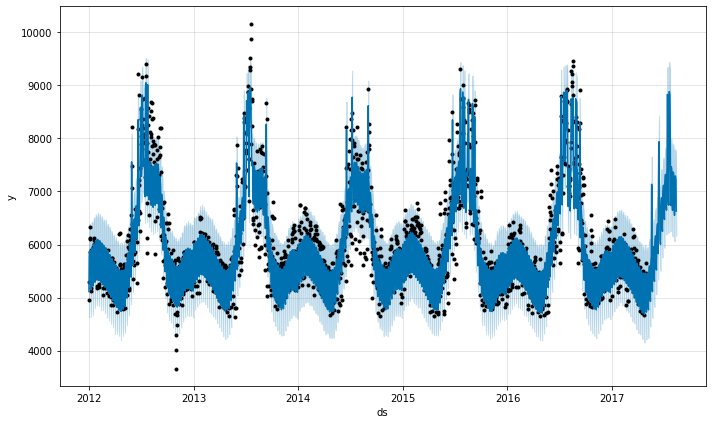

In [ ]:
fig1=mm.plot(forecast)

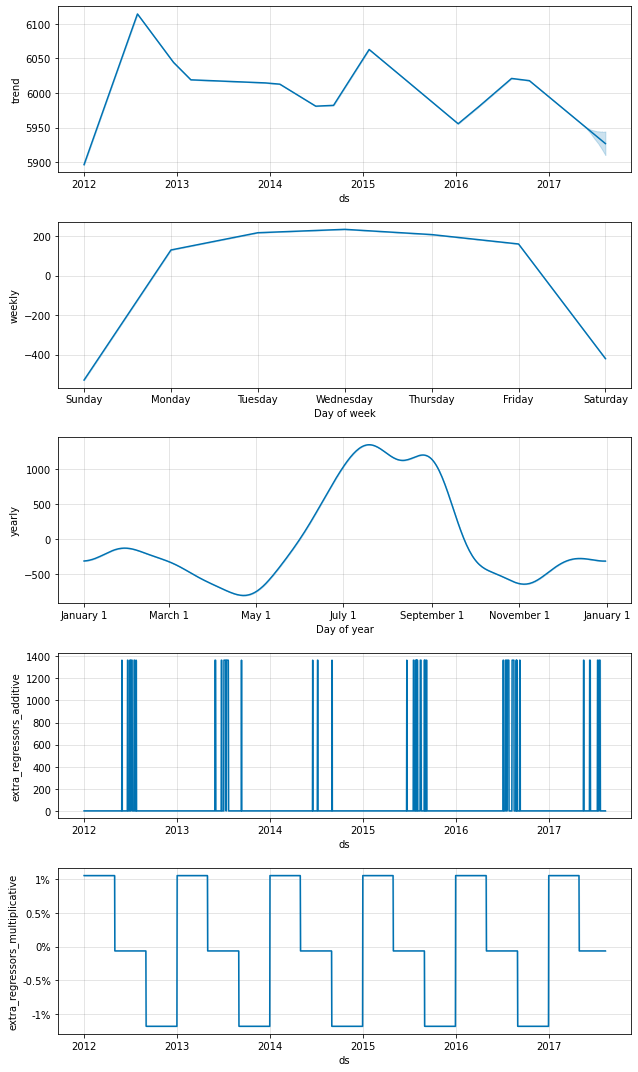

In [ ]:
fig2=mm.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation,performance_metrics
cv_results= cross_validation(mm,initial='731 days',horizon='365 days')
perform_mat=performance_metrics(cv_results)
perform_mat

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,195941.295144,442.652567,341.482959,0.060496,0.050771,0.758242
1,37 days 00:00:00,202023.337718,449.470063,348.398305,0.061664,0.051925,0.747253
2,37 days 12:00:00,203097.800055,450.663733,350.642463,0.062039,0.052547,0.747253
3,38 days 00:00:00,206158.027340,454.046283,354.462907,0.062452,0.053082,0.747253
4,38 days 12:00:00,208129.816329,456.212468,358.236695,0.063057,0.053576,0.741758
...,...,...,...,...,...,...,...
653,363 days 00:00:00,117277.247764,342.457658,268.849906,0.048992,0.042785,0.921245
654,363 days 12:00:00,116436.512033,341.227947,267.212556,0.048708,0.042785,0.928571
655,364 days 00:00:00,119080.335428,345.080187,269.345805,0.049283,0.042919,0.930403
656,364 days 12:00:00,117822.711252,343.253130,267.284752,0.048923,0.042785,0.934066


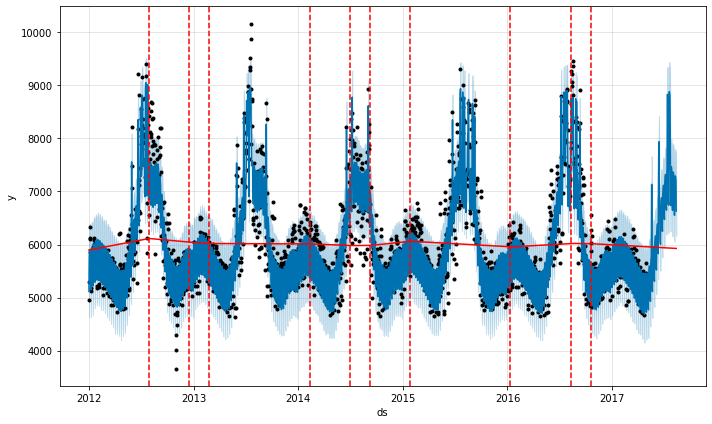

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = mm.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), mm, forecast)

In [ ]:
mm.changepoints

70     2012-03-11
140    2012-05-20
210    2012-07-29
280    2012-10-07
350    2012-12-16
420    2013-02-24
490    2013-05-05
560    2013-07-14
630    2013-09-22
700    2013-12-01
770    2014-02-09
840    2014-04-20
911    2014-06-30
981    2014-09-08
1051   2014-11-17
1121   2015-01-26
1191   2015-04-06
1261   2015-06-15
1331   2015-08-24
1401   2015-11-02
1471   2016-01-11
1541   2016-03-21
1611   2016-05-30
1681   2016-08-08
1751   2016-10-17
Name: ds, dtype: datetime64[ns]